In [ ]:
import numpy as np
import argparse
import dlib
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import imutils
from imutils import face_utils
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dataset_split.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Shared.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/Shared/shape_predictor_68_face_landmarks.dat')


In [ ]:
def get_data(direc):
    X =[]
    y = []
    IMG_SIZE = 50
    categories = os.listdir(direc)
    for category in categories:
        path_link = os.path.join(direc, category)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image),cv2.IMREAD_GRAYSCALE)
            image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            X.append(image_array)
            y.append(int(category))
    return X,y



In [ ]:
X_train,y_train = get_data("/content/dataset_split/train")
X_test,y_test = get_data("/content/dataset_split/test")

In [ ]:
X_train = np.array(X_train).reshape(-1,50,50,1)
X_test = np.array(X_test).reshape(-1,50,50,1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
train_dir = "/content/dataset_split/train"
test_dir = "/content/dataset_split/test"

In [ ]:
batch=32

In [ ]:
learning_rate = 0.0001
adam = Adam(lr=learning_rate)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(monitor = 'val_loss',
                          min_delta = 0, #minimium amount of change to count as an improvement
                          patience = 10, # how many epochs to wait before stopping
                          verbose = 1,
                          restore_best_weights = True),
    ReduceLROnPlateau(factor=0.9, patience=10, min_lr=0.0001),
    ModelCheckpoint('NewEyeModel.h5', verbose=1, save_best_only=True)#, save_weights_only=True
]

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation="relu", input_shape=X_test.shape[1:]))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Conv2D(64, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Conv2D(128, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=adam)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

In [ ]:
history2 = model2.fit(X_train,y_train, batch_size=batch, epochs=100, validation_split=0.2,shuffle = True, verbose=1,callbacks=callbacks)


Epoch 1/100
1532/1532 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.9127
Epoch 1: val_loss improved from inf to 0.26910, saving model to NewEyeModel.h5
1532/1532 [==============================] - 19s 7ms/step - loss: 0.2355 - accuracy: 0.9127 - val_loss: 0.2691 - val_accuracy: 0.8894 - lr: 1.0000e-04
Epoch 2/100
1528/1532 [============================>.] - ETA: 0s - loss: 0.1521 - accuracy: 0.9463
Epoch 2: val_loss improved from 0.26910 to 0.24017, saving model to NewEyeModel.h5
1532/1532 [==============================] - 10s 7ms/step - loss: 0.1519 - accuracy: 0.9464 - val_loss: 0.2402 - val_accuracy: 0.9134 - lr: 1.0000e-04
Epoch 3/100
1525/1532 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.9610
Epoch 3: val_loss did not improve from 0.24017
1532/1532 [==============================] - 10s 7ms/step - loss: 0.1123 - accuracy: 0.9610 - val_loss: 0.2822 - val_accuracy: 0.9005 - lr: 1.0000e-04
Epoch 4/100
1530/1532 [==================

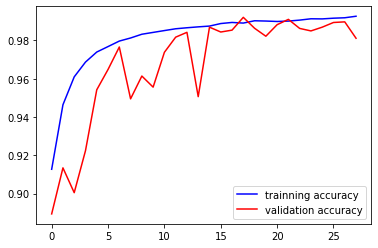

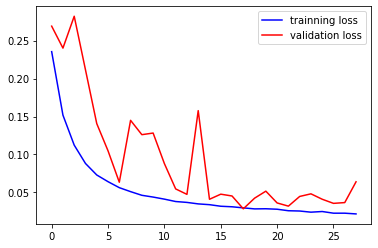

Model Evaluation
Loss: 0.096
Accuracy: 0.969



In [ ]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

(loss,acc) = model2.evaluate(X_test,y_test, verbose=0)
print('Model Evaluation')
print('Loss: %.3f' % loss)
print('Accuracy: %.3f' % acc)
print()